# New section# 🛒 Grocery Inventory Manager for FreshMart Retail

### 📌 Project Overview  
FreshMart Retail, a local grocery store chain, needs a system to manage inventory effectively.  
This project aims to develop a tool to:
- Track current grocery stock  
- Monitor sales and purchase activity  
- Reduce overstocking or stockouts  
- Recommend restocking quantities


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
data = {
    'ProductID': [1, 2, 3, 4, 5],
    'ProductName': ['Rice', 'Milk', 'Bread', 'Sugar', 'Oil'],
    'Category': ['Grains', 'Dairy', 'Bakery', 'Essentials', 'Essentials'],
    'CurrentStock': [40, 10, 5, 35, 70],
    'MinRequiredStock': [50, 20, 10, 40, 60],
    'UnitsSoldThisWeek': [30, 45, 20, 18, 5]
}

df = pd.DataFrame(data)
df


,ProductID,ProductName,Category,CurrentStock,MinRequiredStock,UnitsSoldThisWeek
0,1,Rice,Grains,40,50,30
1,2,Milk,Dairy,10,20,45
2,3,Bread,Bakery,5,10,20
3,4,Sugar,Essentials,35,40,18
4,5,Oil,Essentials,70,60,5


In [59]:
low_stock = df[df['CurrentStock'] < df['MinRequiredStock']]
print("🟥 Low Stock Items:")
low_stock


🟥 Low Stock Items:


,ProductID,ProductName,Category,CurrentStock,MinRequiredStock,UnitsSoldThisWeek
0,1,Rice,Grains,40,50,30
1,2,Milk,Dairy,10,20,45
2,3,Bread,Bakery,5,10,20
3,4,Sugar,Essentials,35,40,18


In [60]:
df['ReorderQty'] = df.apply(
    lambda row: row['MinRequiredStock'] - row['CurrentStock'] if row['CurrentStock'] < row['MinRequiredStock'] else 0,
    axis=1
)
df[['ProductName', 'CurrentStock', 'MinRequiredStock', 'ReorderQty']]


,ProductName,CurrentStock,MinRequiredStock,ReorderQty
0,Rice,40,50,10
1,Milk,10,20,10
2,Bread,5,10,5
3,Sugar,35,40,5
4,Oil,70,60,0


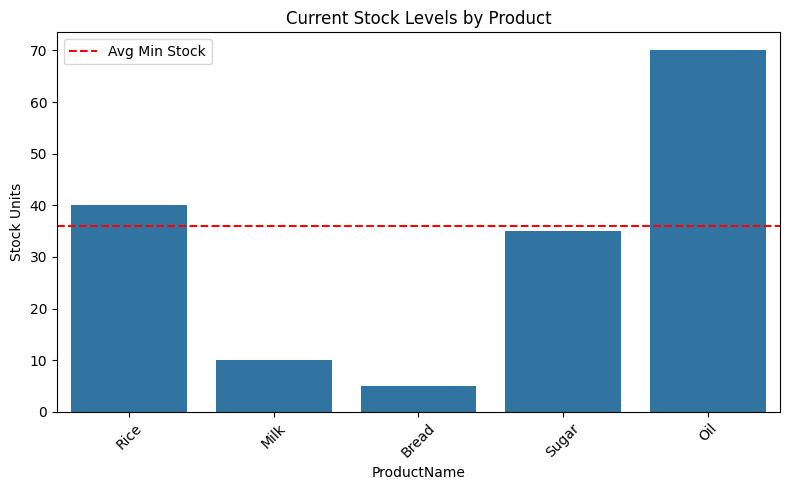

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x='ProductName', y='CurrentStock', data=df)
plt.axhline(df['MinRequiredStock'].mean(), color='red', linestyle='--', label='Avg Min Stock')
plt.title('Current Stock Levels by Product')
plt.ylabel('Stock Units')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
df.to_csv('FreshMart_Inventory_Report.csv', index=False)
print("📁 Inventory report saved as FreshMart_Inventory_Report.csv")


📁 Inventory report saved as FreshMart_Inventory_Report.csv


# New section### ✅ Conclusion

- The tool helps FreshMart track grocery items and avoid shortages.  
- Products like Milk and Bread were identified as low stock.  
- Recommendations are made to reorder stock as needed.  
- A CSV file is generated for reporting.

**This system improves operational efficiency and inventory control.**
